Q1. Problem Statement: DBSCAN Clustering

Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks

1. Find the correlation among the all the columns and drop the column/s with the least correlation

2. Encode the "Gender" column using get_dummies() function

3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

4. Print the size of each cluster and also the size of outliers' cluster

5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['Gender'])

In [8]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [9]:
df.drop(columns=['CustomerID'],inplace=True)

In [10]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [11]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


<AxesSubplot:>

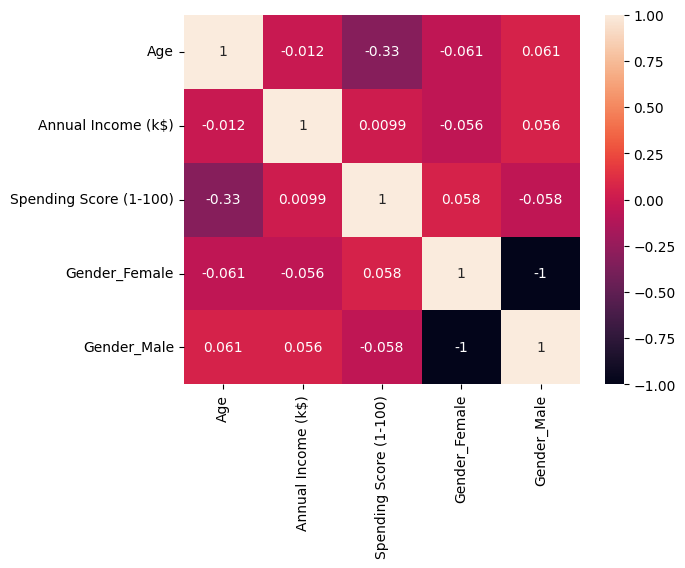

In [12]:
sns.heatmap(df.corr(),annot= True)

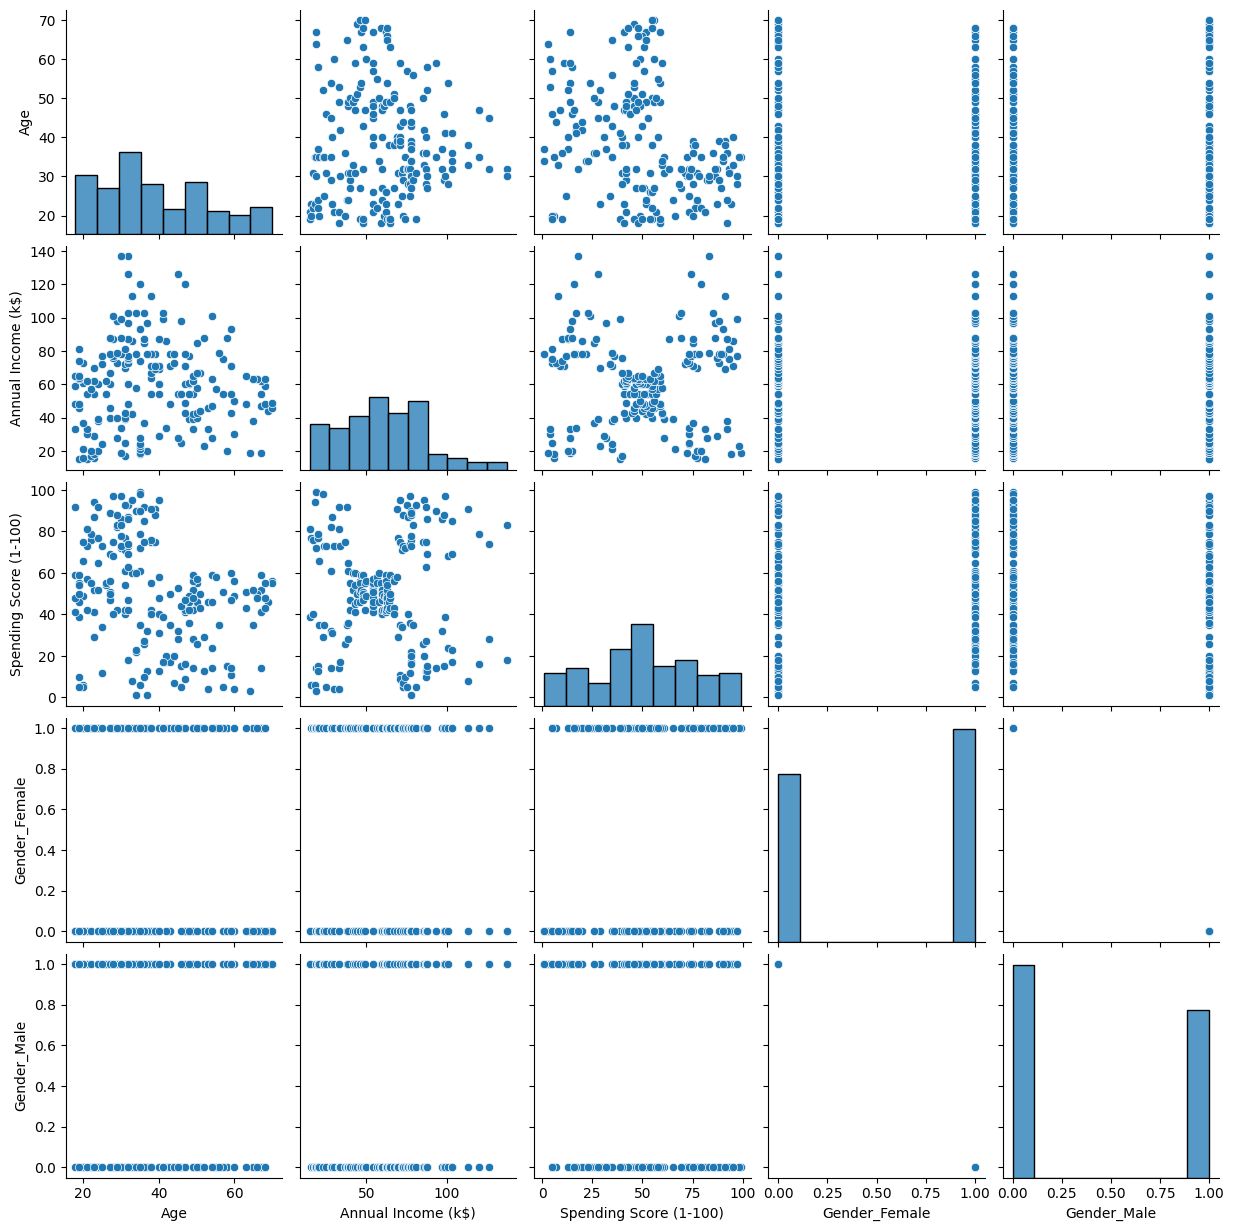

In [13]:
sns.pairplot(df)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

In [15]:
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


#### Applying Densitiy Based Spacial clustering of application with noise on the data . here we are creating cluster with eps = 12.5 min_samples = 4

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [23]:
DBS_clustering = DBSCAN(eps=12.5,min_samples=4).fit(df)
DBSCAN_clustered = df.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

### Calculate the size of each cluster created and also the number of outliers

In [24]:
# calculating the size of each cluster created
DBSCAN_clust_sizes = DBSCAN_clustered.groupby("Cluster").size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


### Step-8:DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly- outliers. Now we can find out how annual income effects the spending rate of the potential customers


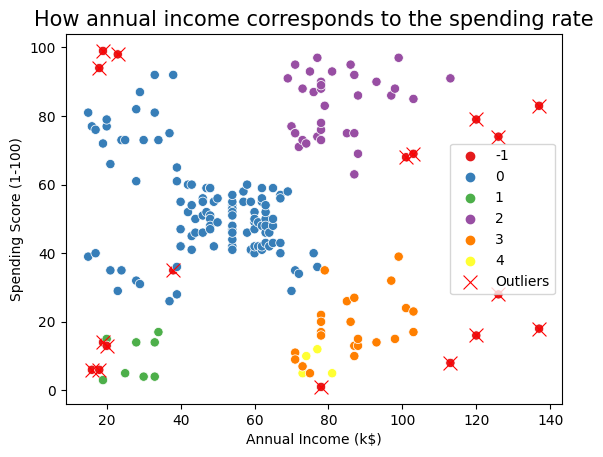

In [35]:
# Defining the outliers
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

ax = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                     data=DBSCAN_clustered,
                     hue='Cluster', palette='Set1', legend='full', s=45)

# Highlighting outliers
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=outliers, color='red', marker='x', s=100, label='Outliers', ax=ax)

ax.set_xlabel('Annual Income (k$)', fontsize=10)
ax.set_ylabel('Spending Score (1-100)', fontsize=10)
ax.set_title('How annual income corresponds to the spending rate', fontsize=15)
ax.legend()  # Show legend for both main clusters and outliers


Text(0.5, 1.0, 'How annual income corresponds to the spending rate')

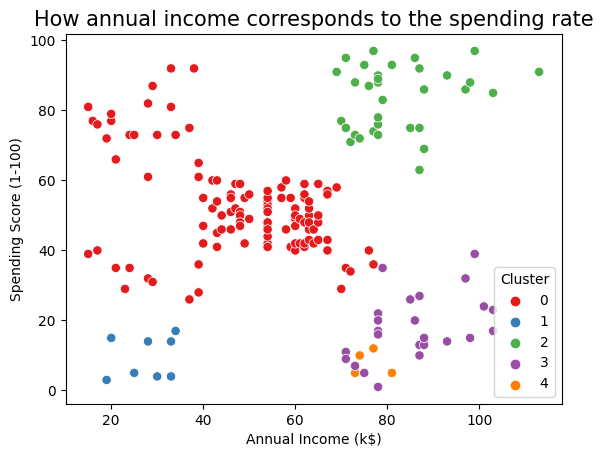

In [32]:
# Defining the outliers
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

ax = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                     data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                     hue='Cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize=10)
ax.set_ylabel('Spending Score (1-100)', fontsize=10)
ax.set_title('How annual income corresponds to the spending rate', fontsize=15)
